In [2]:
%pip install segment-geospatial groundingdino-py leafmap localtileserver

In [2]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

In [27]:
# Import necessary libraries
import leafmap
import json
import geopandas as gpd # Import geopandas for reading local files

# ... (rest of your code)
m = leafmap.Map( )

# Load GeoJSON and add to map
# Use geopandas to read the local GeoJSON file
geojson_data = gpd.read_file('/content/ahmedabad_10km_buffer.geojson')
m.add_geojson(geojson_data, layer_name="AOI")

# Extract bbox from GeoJSON
geojson_dict = json.loads(geojson_data.to_json())
bbox = geojson_data.total_bounds
print("Using bbox from GeoJSON:", bbox)
  # Average of min and max latitude

# Initialize map with calculated center

m.add_basemap("SATELLITE")
m.fit_bounds = bbox
m
# ... (rest of your code using the 'bbox' variable)

Using bbox from GeoJSON: [ 228639.00079887 2526061.97214742  274527.85436267 2571215.54879463]


Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [28]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-122.2659, 37.8682, -122.2521, 37.8741]

m.user_roi_bounds()

[72.5796, 23.0163, 72.5838, 23.0189]

In [29]:
image = "satellite.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=19, source="Satellite", overwrite=True)

Downloaded image 01/35
Downloaded image 02/35
Downloaded image 03/35
Downloaded image 04/35
Downloaded image 05/35
Downloaded image 06/35
Downloaded image 07/35
Downloaded image 08/35
Downloaded image 09/35
Downloaded image 10/35
Downloaded image 11/35
Downloaded image 12/35
Downloaded image 13/35
Downloaded image 14/35
Downloaded image 15/35
Downloaded image 16/35
Downloaded image 17/35
Downloaded image 18/35
Downloaded image 19/35
Downloaded image 20/35
Downloaded image 21/35
Downloaded image 22/35
Downloaded image 23/35
Downloaded image 24/35
Downloaded image 25/35
Downloaded image 26/35
Downloaded image 27/35
Downloaded image 28/35
Downloaded image 29/35
Downloaded image 30/35
Downloaded image 31/35
Downloaded image 32/35
Downloaded image 33/35
Downloaded image 34/35
Downloaded image 35/35
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


In [30]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=29143663.0, center=[23.0176, 72.5817], controls=(ZoomControl(options=['position', 'zoom_in_text', '…

ERROR:localtileserver.web.application:Exception on /api/tiles/16/45980/28460.png [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/usr/local/lib/python3.10/dist-packages/flask_restx/api.py", line 402, in wrapper
    resp = resource(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/flask/views.py", line 107, in view
    return current_app.ensure_sync(self.dispatch_request)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/flask_restx/resource.py", line 41, in dispatch_request
    resp = meth(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/flask_caching/__init__.py", line 426, in decorated_function
    rv = self._call_fn(f, *args, **kwargs)
  File "/u

In [31]:
sam = LangSAM()

final text_encoder_type: bert-base-uncased


In [55]:
#text_prompt="forest "

In [61]:
text_prompt = "group of connected and discrete  trees"

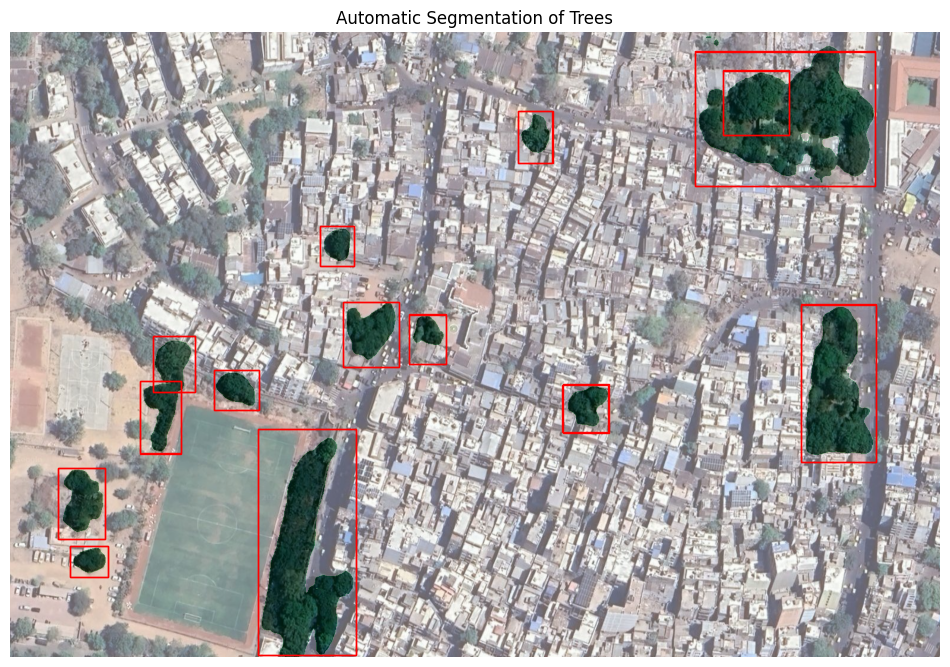

In [62]:
sam.predict(image, text_prompt, box_threshold=0.25, text_threshold=0.20)
sam.show_anns(
    cmap="Greens",
    box_color="red",
    title="Automatic Segmentation of Trees",
    blend=True,
)

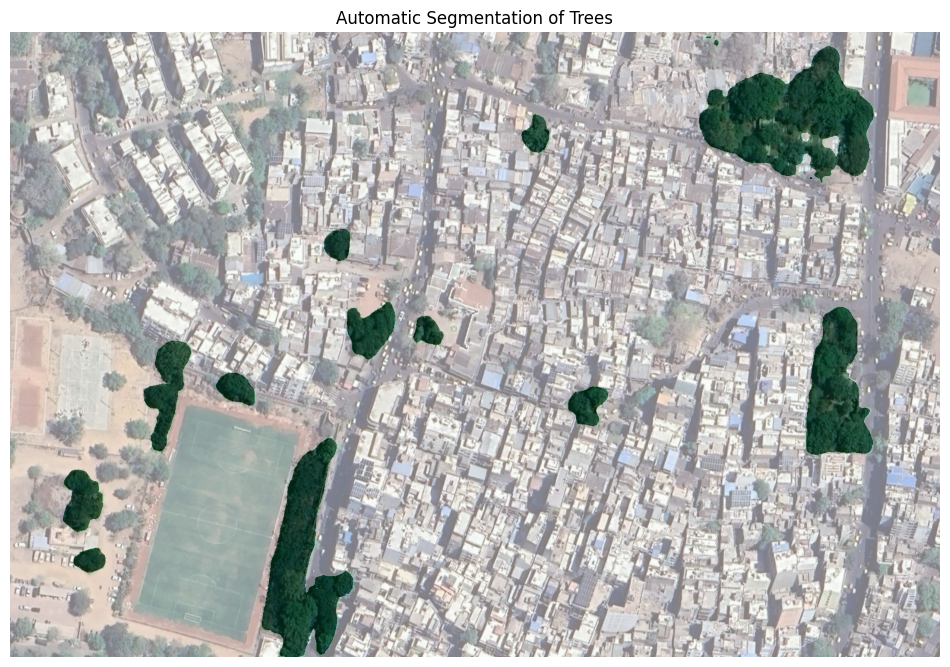

In [63]:
sam.show_anns(
    cmap="Greens",
    add_boxes=False,
    alpha=0.5,
    title="Automatic Segmentation of Trees",
)

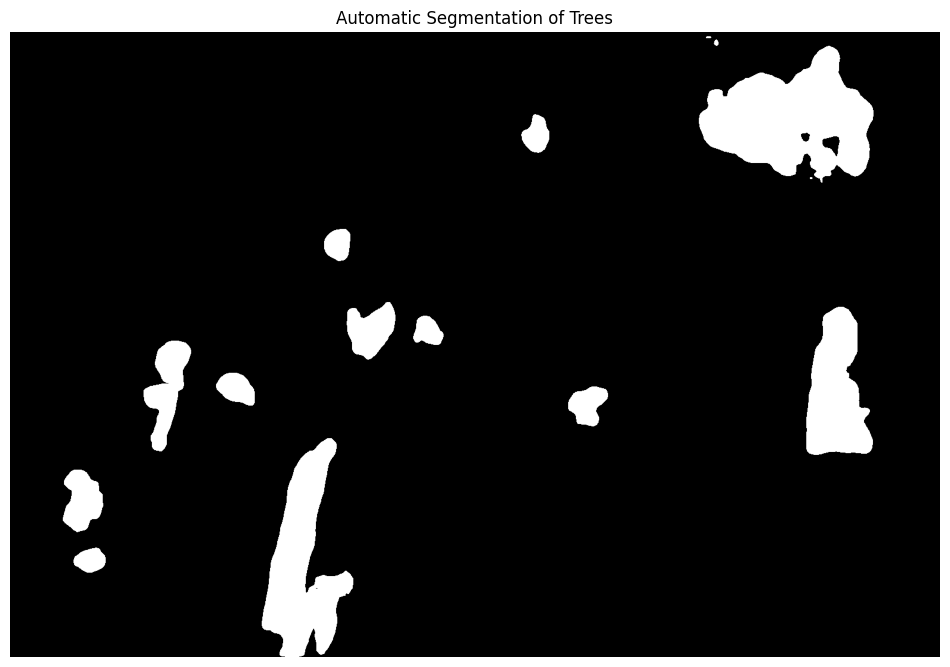

In [64]:
sam.show_anns(
    cmap="Greys_r",
    add_boxes=False,
    alpha=1,
    title="Automatic Segmentation of Trees",
    blend=False,
    output="trees.tif",
)

In [65]:
sam.raster_to_vector("trees.tif", "trees.shp")

In [66]:
m.add_raster("trees.tif", layer_name="Trees", palette="Greens", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("trees.shp", layer_name="Vector", style=style)
m

Map(bottom=1821714.0, center=[23.0176, 72.5817], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

ERROR:localtileserver.web.application:Exception on /api/tiles/18/183924/113840.png [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/usr/local/lib/python3.10/dist-packages/flask_restx/api.py", line 402, in wrapper
    resp = resource(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/flask/views.py", line 107, in view
    return current_app.ensure_sync(self.dispatch_request)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/flask_restx/resource.py", line 41, in dispatch_request
    resp = meth(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/flask_caching/__init__.py", line 426, in decorated_function
    rv = self._call_fn(f, *args, **kwargs)
  File "

In [72]:
sam.show_map()

Map(center=[23.0176, 72.5817], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Pixel Resolution: 0.2985580212854106 meters/pixel
Number of trees detected: 52
Total area covered by trees: 485992.00 square meters


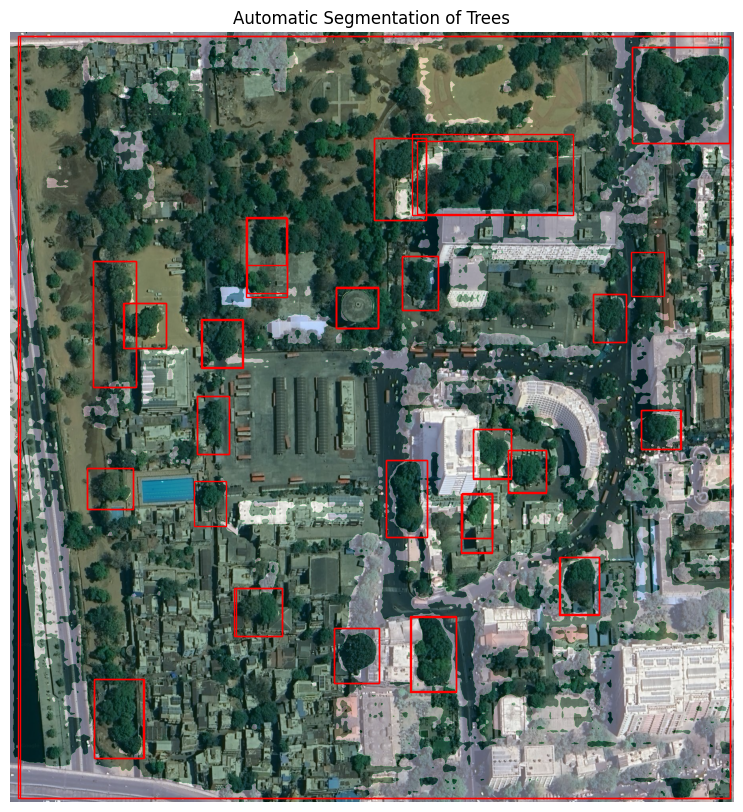

In [25]:
# ... (your existing code) ...

results=sam.predict(image, text_prompt, box_threshold=0.20, text_threshold=0.80)
sam.show_anns(
    cmap="Greens",
    box_color="red",
    title="Automatic Segmentation of Trees",
    blend=True,
)

# Count bounding boxes and area
masks = sam.masks

num_trees = len(masks)  # Number of trees detected


# Calculate area
import rasterio
with rasterio.open(image) as src:
    resolution = src.res[0]  # Assuming square pixels, resolution in meters/pixel
    print(f"Pixel Resolution: {resolution} meters/pixel")

total_tree_area = 0
for mask in masks:
    tree_area_pixels = mask.sum()
    tree_area_sq_meters = tree_area_pixels * (resolution ** 2)
    total_tree_area += tree_area_sq_meters

print(f"Number of trees detected: {num_trees}")
print(f"Total area covered by trees: {total_tree_area:.2f} square meters")

In [ ]:
import samgeo

# Initialize LangSAM
sam = LangSAM()

# First prompt for individual trees
'''text_prompt1 = "tree"
sam.predict(image, text_prompt1, box_threshold=0.20, text_threshold=0.20)
sam.show_anns(
    cmap="Greens",
    box_color="red",
    title="Automatic Segmentation of Trees",
    blend=True,
)

masks1 = sam.masks'''


# Second prompt for larger areas
text_prompt2 = "group of connected  trees"
sam.predict(image, text_prompt2, box_threshold=0.15, text_threshold=0.50)
sam.show_anns(
    cmap="Greens",
    box_color="blue",
    title="Automatic Segmentation of forest",
    blend=True,
)  # Lower thresholds for larger areas
masks2 = sam.masks

# Combine masks (you might need to refine this based on your specific needs)
#combined_masks = masks1 + masks2  # or use a more sophisticated merging strategy

# ... (rest of your code for visualization and analysis) ...